In [ ]:
# Importing the Packages
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the image
image = cv2.imread('/content/captestimage_10-02-2024-11-31-20.jpg')

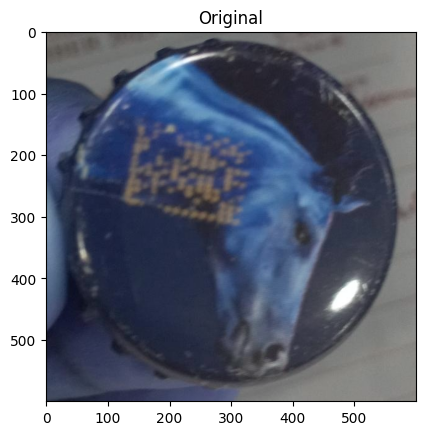

In [ ]:
#Plot the original image
plt.title("Original")
plt.imshow(image)

In [ ]:
# Converting BGR TO RGB:
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

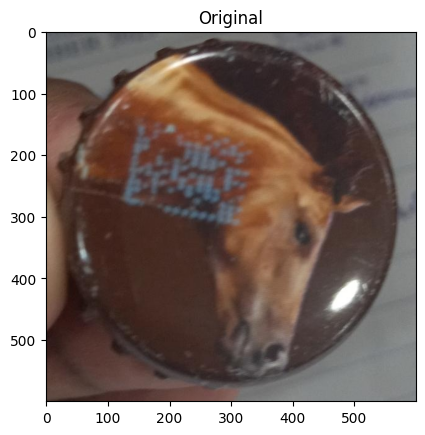

In [ ]:
# Visualization the image
plt.title("Original")
plt.imshow(img_rgb)

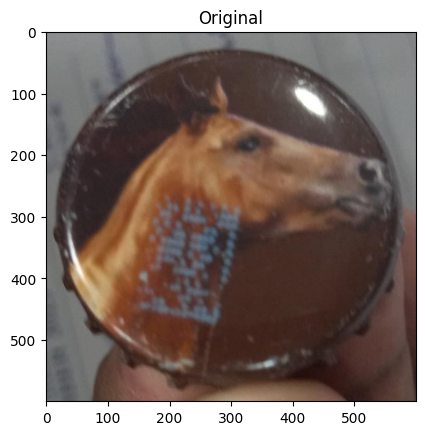

In [ ]:
# Rotate the image by 90 degrees anticlockwise
img_rgb = cv2.rotate(img_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.title("Original")
plt.imshow(img_rgb)

In [ ]:
# Finding size of the image:
img_rgb.shape

(600, 600, 3)

In [ ]:
# Preprocessing Image to extract DATA MATRIX from the image:

In [ ]:
# Applying Gaussian blur # It reduces Noise in the image.
Gaussian_blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)

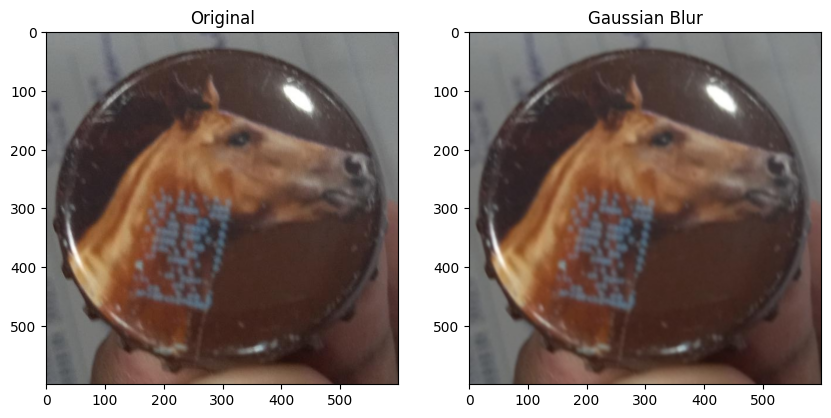

In [ ]:
fig, axes =plt.subplots (1, 2,figsize=(10, 10))
axes[0].set_title("Original")
axes[0].imshow(img_rgb)
axes[1].set_title("Gaussian Blur")
axes[1].imshow(Gaussian_blur)


In [ ]:
# Apply contrast enhancement # It increases clarity and quality of image.
enhanced_image = cv2.convertScaleAbs(Gaussian_blur, alpha=1.5, beta=30)

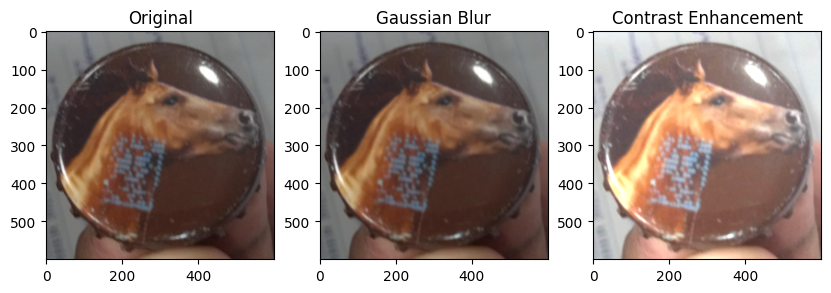

In [ ]:
fig, axes =plt.subplots (1, 3,figsize=(10, 10))
axes[0].set_title("Original")
axes[0].imshow(img_rgb)
axes[1].set_title("Gaussian Blur")
axes[1].imshow(Gaussian_blur)
axes[2].set_title("Contrast Enhancement")
axes[2].imshow(enhanced_image)


In [ ]:
# Apply sharpening # It enhances edges and details in the image and improves the clearity in Image.
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(enhanced_image, -1, kernel)

"for ax in axes.flatten():\n    ax.axis('off')\nplt.tight_layout()\nplt.show()"

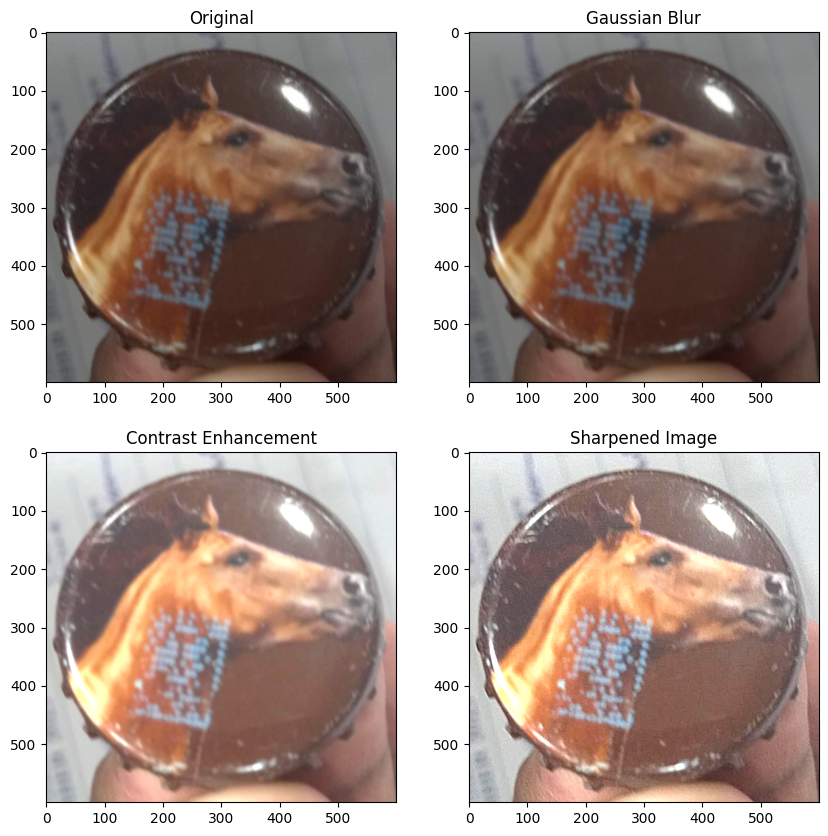

In [ ]:
fig, axes =plt.subplots (2, 2,figsize=(10, 10))
axes[0,0].set_title("Original")
axes[0,0].imshow(img_rgb)
axes[0,1].set_title("Gaussian Blur")
axes[0,1].imshow(Gaussian_blur)
axes[1,0].set_title("Contrast Enhancement")
axes[1,0].imshow(enhanced_image)
axes[1,1].set_title("Sharpened Image")
axes[1,1].imshow(sharpened_image)
'''for ax in axes.flatten():
    ax.axis('off')
plt.tight_layout()
plt.show()'''

In [ ]:
# Splitting the Image (Because given Image looks two images blended together)
bs,gs,rs = cv2.split(sharpened_image)

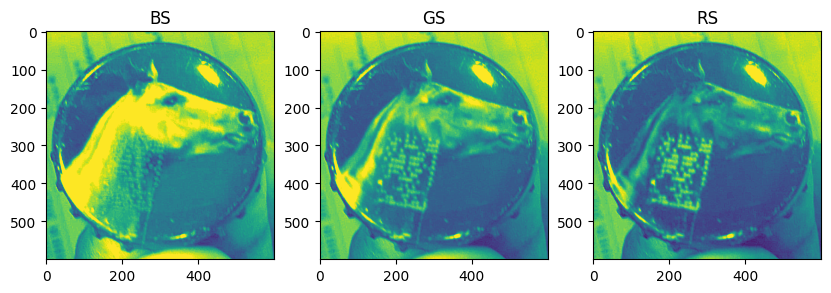

In [ ]:
fig, axes =plt.subplots (1, 3,figsize=(10, 10))
axes[0].set_title("BS")
axes[0].imshow(bs)
axes[1].set_title("GS")
axes[1].imshow(gs)
axes[2].set_title("RS")
axes[2].imshow(rs)

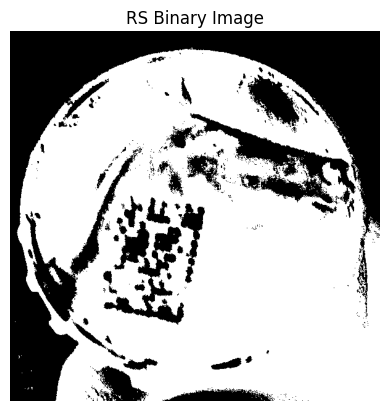

In [ ]:
# Converting rs image to  Binary Image (Black & White)
# Apply thresholding to convert the image to binary
threshold_value = 128
_, rs_binary = cv2.threshold(rs, threshold_value, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# Display the binary image
plt.imshow(rs_binary, cmap='binary')
plt.title('RS Binary Image')
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
# Extraction of Data matrix using Contour of the image:

In [ ]:
# compute the Scharr gradient magnitude representation from the grayscale image:
# in both the x and y direction using OpenCV 2.4
import imutils
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(rs, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(rs, ddepth=ddepth, dx=0, dy=1, ksize=-1)

In [ ]:
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient) # contrast enhancement

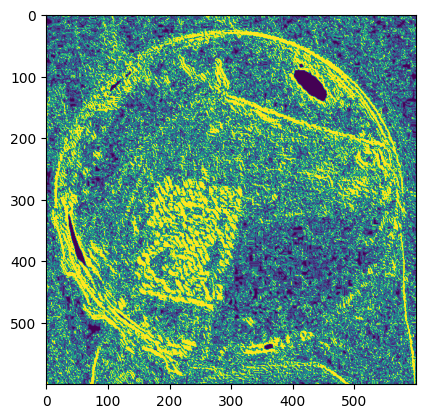

In [ ]:
plt.imshow(gradient)

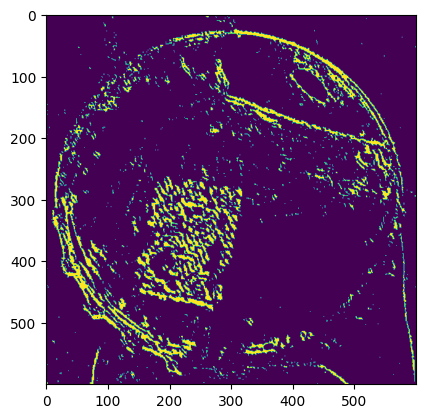

In [ ]:
blurred = cv2.blur(gradient, (3, 3))  # blur
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)  # sIMPLE THRESHOLDING
#(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # OTSU THRESHOLDING
#ada_thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,35,2) # ADAPTIVE THRESHOLDING
plt.imshow(thresh)
# plt.imshow(thresh,cmap='binary')

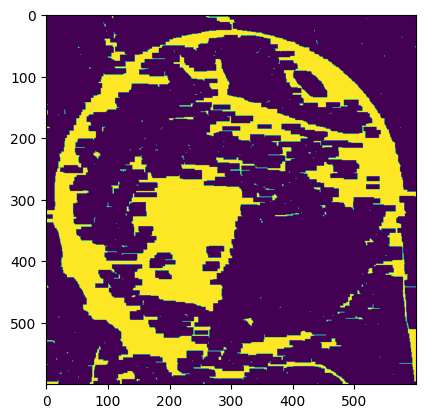

In [ ]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [ ]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

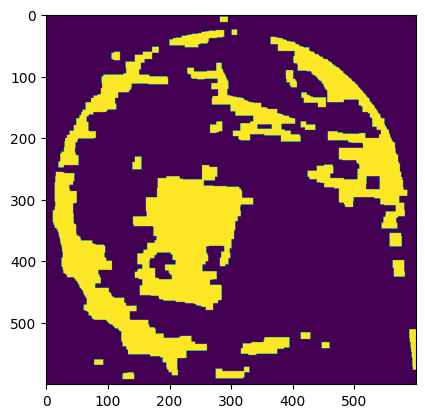

In [ ]:
plt.imshow(closed)

In [ ]:
im5= rs.copy()

<ipython-input-50-582732243839>:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


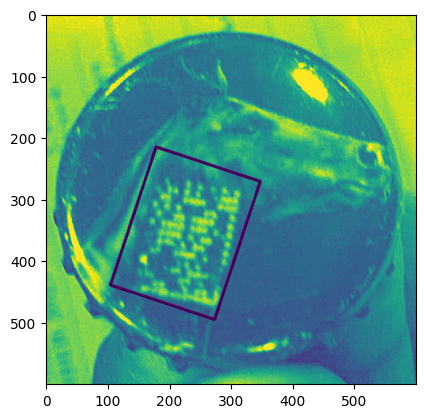

In [ ]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(im5, [box], -1, (0, 255, 0), 3)
plt.imshow(im5)

In [ ]:
# Thus, we detected the Data Matrix using the contours of the given image
# Lets plot the Datamatrix.

In [ ]:
im6 = rs_binary.copy()

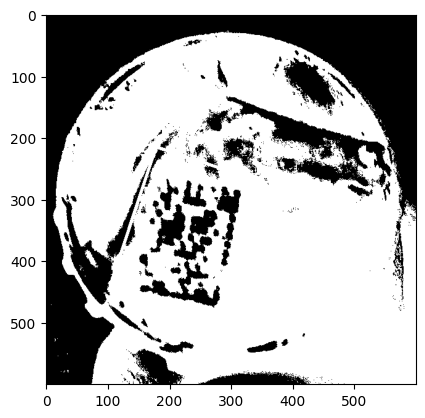

In [ ]:
cv2.drawContours(im6, [box], -1, (0, 255, 0), 3)
plt.imshow(im6,cmap='binary')

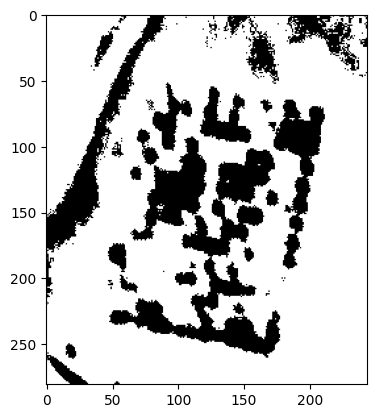

In [ ]:
# Extract the region of interest (ROI) within the bounding box:
x, y, w, h = cv2.boundingRect(box)  # Get bounding box coordinates
DM = rs_binary[y:y+h, x:x+w]  # Slice the image to extract the ROI
plt.imshow(DM, cmap='binary')

(-0.5, 599.5, 599.5, -0.5)

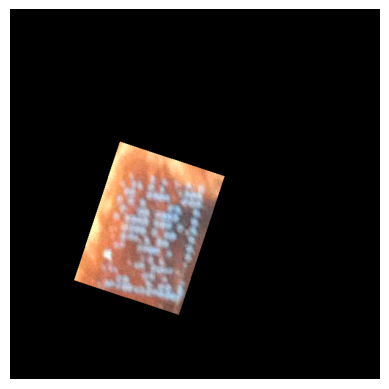

In [ ]:
# Removing Background from the Image and Showing only the Data_Matrix:
# Extract the coordinates of the bounding box
x1, y1 = box[0]
x2, y2 = box[1]
x3, y3 = box[2]
x4, y4 = box[3]

# Create a mask of zeros with the same shape as the input image
mask = np.zeros_like(sharpened_image)

# Fill the region within the bounding box with white color (255)
pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)
cv2.fillPoly(mask, [pts], (255, 255, 255))

# Apply the mask to the original image
result = cv2.bitwise_and(sharpened_image, mask)

# Display the result
plt.imshow(result)
plt.axis('off')

In [ ]:
# Create a mask of zeros with the same shape as the input image
mask = np.zeros_like(rs_binary)

# Fill the region within the bounding box with white color (255)
pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], np.int32)
cv2.fillPoly(mask, [pts], (255, 255, 255))

# Apply the mask to the original image
result2 = cv2.bitwise_and(rs_binary, mask)

# Display the result
plt.imshow(result2, cmap='binary')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

(-0.5, 243.5, 280.5, -0.5)

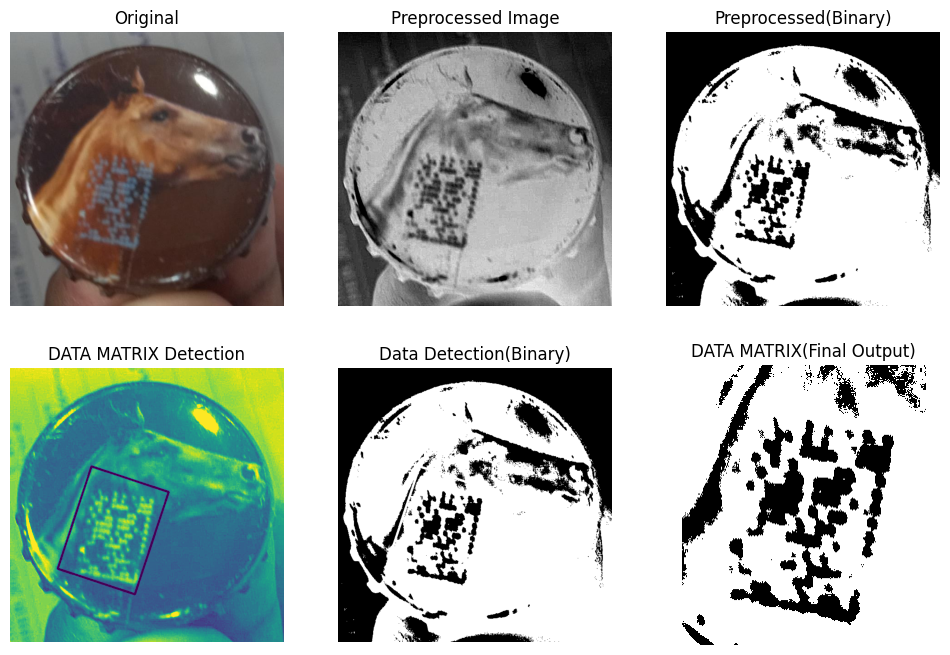

In [ ]:
fig, axes =plt.subplots (2, 3,figsize=(12,8))
axes[0][0].set_title("Original")
axes[0][0].imshow(img_rgb)
axes[0][0].axis("off")
axes[0][1].set_title("Preprocessed Image")
axes[0][1].imshow(rs, cmap='binary')
axes[0][1].axis("off")
axes[0][2].set_title("Preprocessed(Binary)")
axes[0][2].imshow(rs_binary, cmap='binary')
axes[0][2].axis("off")
axes[1][0].set_title("DATA MATRIX Detection")
axes[1][0].imshow(im5)
axes[1][0].axis("off")
axes[1][1].set_title("Data Detection(Binary)")
axes[1][1].imshow(im6,cmap='binary')
axes[1][1].axis("off")
axes[1][2].set_title("DATA MATRIX(Final Output)")
axes[1][2].imshow(DM,cmap='binary')
axes[1][2].axis("off")